# Lesson 13 - Evaluating a classifier
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1 - Readable Predictions

### Exercise 1 - Load data and make it more readable
- Load the data in the cancer.csv file in the shared data folder.
- Use `factor()` to make the `Class` variable in the cancer data more human readable. Recall that lumps with Class 0 are benign and lumps with Class 1 are cancerous.

In [2]:
cancer <- read.csv('~/shared/data/cancer.csv')

cancer$Class <- factor(cancer$Class, 
                       levels = c(0,1), 
                       labels = c('benign', 'cancerous')
                      )
#cancer <- mutate(cancer, Class = factor(Class, 
#.                                       levels = c(0,1), 
#                                        labels = c('benign', 'cancerous')
#.                                        )
#.               )
head(cancer)

,ID,Clump.Thickness,Uniformity.of.Cell.Size,Uniformity.of.Cell.Shape,Marginal.Adhesion,Single.Epithelial.Cell.Size,Bare.Nuclei,Bland.Chromatin,Normal.Nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,cancerous


### Exercise 2 - Split data and Classify 

In lesson 13, you split the cancer data into a training data set and a test data set. Then, you created a classifier function and used it to predict the class of the observations in the test data set. In Exercise 1 above, you change the values in the Class variable of the cancer data set to be more human readable. 

Alter the code from lesson 12 so that the Predictions column is also more human readable. You can do this by changing the classifier function or using `factor()`.

In [3]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
## Lesson 13 Solution
## Version 1

training <- cancer[1:400,]
test <- cancer[401:nrow(cancer),]

# a is the marginal adhesion
# t is the thickness

classifier <- function (a, t){
    if(a>4){
        Class <- 'cancerous' ### NEW ###
    } else if (t > 6){
        Class <- 'cancerous' ### NEW ###
    } else {
        Class <- 'benign' ### NEW ###
    }
    Class
}
classifier <- Vectorize(classifier)

test <- mutate(test, Prediction = classifier(
                                    Marginal.Adhesion, 
                                    Clump.Thickness
                                )
            )
test <- select(test, Marginal.Adhesion, Clump.Thickness, Prediction, Class)
head(test)

,Marginal.Adhesion,Clump.Thickness,Prediction,Class
,<int>,<int>,<chr>,<fct>
401,6,3,cancerous,benign
402,5,8,cancerous,cancerous
403,1,1,benign,benign
404,2,5,benign,benign
405,1,2,benign,benign
406,3,3,benign,benign


In [5]:
## Lesson 13 Solution
## Version 2

training <- cancer[1:400,]
test <- cancer[401:nrow(cancer),]

# a is the marginal adhesion
# t is the thickness

classifier <- function (a, t){
    if(a>4){
        Class <- 1
    } else if (t > 6){
        Class <- 1
    } else {
        Class <- 0
    }
    Class
}
classifier <- Vectorize(classifier)

test <- mutate(
            test, 
            Prediction = classifier(Marginal.Adhesion, Clump.Thickness)
        )
test <- mutate(
            test, 
            Prediction = factor(
                            Prediction, 
                            levels = c(0,1), 
                            labels = c('benign', 'cancerous')
                        )
            ) ### NEW ###
test <- select(
            test, 
            Marginal.Adhesion, 
            Clump.Thickness,
            Prediction, 
            Class
        )
head(test)

,Marginal.Adhesion,Clump.Thickness,Prediction,Class
,<int>,<int>,<fct>,<fct>
401,6,3,cancerous,benign
402,5,8,cancerous,cancerous
403,1,1,benign,benign
404,2,5,benign,benign
405,1,2,benign,benign
406,3,3,benign,benign


## Part 2 Accuracy

### Exercise 3 - Accuracy type function
- Create a function that gives the accuracy type (true / false positive / negative) of an observation based on the values of the Class and Prediction variables. 
- Test your function against the four possible pairs of Class and Prediction values.

Hint: You may find the `paste()` function helpful, but it is not necessary. 

In [6]:
## Expected solution

# c is the class
# p is the prediction
accuracy_type <- function(c,p){
    if (c == p){
        if (p == 'cancerous'){
            'true positive'
        } else {
            'true negative'
        }
    } else {
        if (p == 'cancerous'){
            'false positive'
        } else {
            'false negative'
        }
    }
}

accuracy_type('benign', 'benign')
accuracy_type('cancerous', 'benign')

accuracy_type('cancerous', 'cancerous')
accuracy_type('benign', 'cancerous')

[1] "true negative"

[1] "false negative"

[1] "true positive"

[1] "false positive"

In [7]:
?paste

In [8]:
## Alternative solution
# c is the class
# p is the prediction
accuracy_type <- function(c,p){
    if (c == p){
        tf <- 'true'
    } else {
        tf <- 'false'
    }
    
    if (p == 'cancerous'){
        pn <-'positive'
    } else {
        pn <- 'negative'
    }
    paste(tf,pn)
}

accuracy_type('benign', 'benign')
accuracy_type('cancerous', 'benign')

accuracy_type('cancerous', 'cancerous')
accuracy_type('benign', 'cancerous')

[1] "true negative"

[1] "false negative"

[1] "true positive"

[1] "false positive"

### Exercise 4 - Accuracy type column
- Use your function from the previous exercise to fill in a column called `Accuracy` in the test data set. 
- Create a summary table with the count of each of the four accuracy types

Hint: Don't forget to vectorize!

In [9]:
accuracy_type <- Vectorize(accuracy_type)

test <- mutate(test, Accuracy = accuracy_type(Class, Prediction))

summarize( group_by(test, Accuracy), Count = n())

Accuracy,Count
<chr>,<int>
false negative,7
false positive,6
true negative,210
true positive,60


## Examples from notes

### Example 1 - Random data

In [10]:
library(dplyr)
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


In [11]:
# Generate 500 random points
random_points <- data.frame(
    'x_coord' = round(runif(500, 0, 10),2),
    'y_coord' = round(runif(500, 0, 2.5),2)
)
random_points <- mutate(random_points, is_special = ((runif(500,0,100)<=6) + ((x_coord > 6)|(runif(500,0,100)<=6))) %% 2)

head(random_points)

,x_coord,y_coord,is_special
,<dbl>,<dbl>,<dbl>
1,0.80,0.62,0
2,0.38,1.45,0
3,3.11,1.65,0
4,9.15,0.73,1
5,5.90,0.85,0
6,2.40,1.17,0


In [12]:
### NEW ###
# Make is_special column more readable
random_points <- mutate(random_points, 
                        is_special =  factor(
                            is_special,
                            levels = c(0,1),
                            labels = c("No", "Yes")
                        )
                       )
head(random_points)

,x_coord,y_coord,is_special
,<dbl>,<dbl>,<fct>
1,0.80,0.62,No
2,0.38,1.45,No
3,3.11,1.65,No
4,9.15,0.73,Yes
5,5.90,0.85,No
6,2.40,1.17,No


In [13]:
# Split data into training data and test data
training <- random_points[1:300,]
test <- random_points[301:nrow(random_points),]

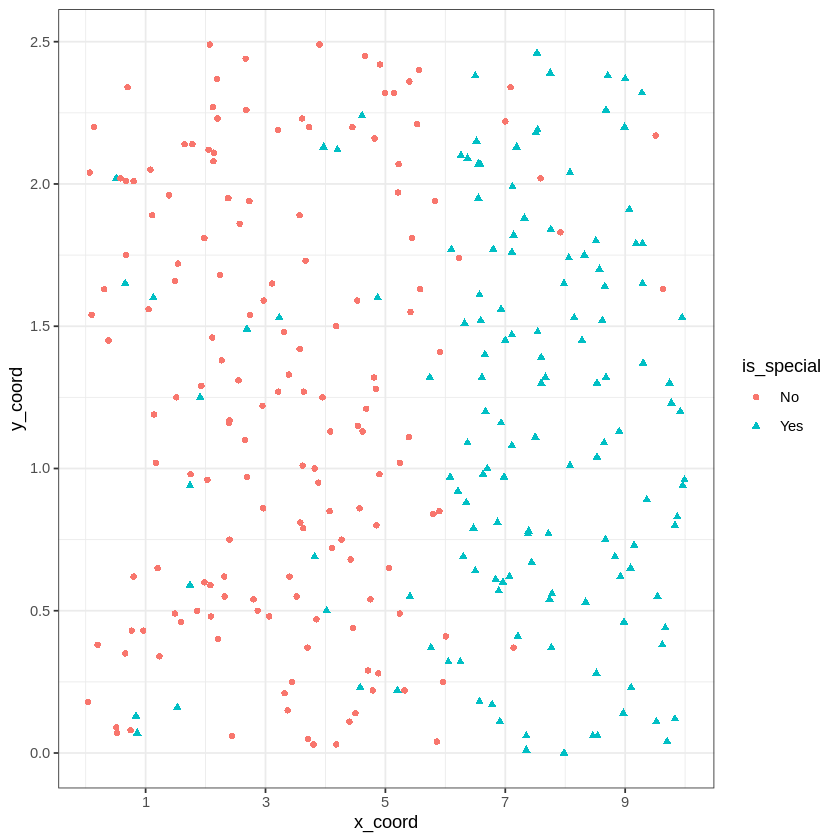

In [14]:
# plot training data
ggplot(training, aes(x=x_coord, y=y_coord, color = is_special, shape=is_special)) + 
    geom_point() +
    scale_x_continuous(breaks = seq(1,10,2)) +
    theme_bw()

In [15]:
# Create classifier function and use it to make predictions about the traing data
points_classifier <- function(x,y){
    if(x>6) {
        'Yes'
    } else {
        'No'
    }
}
points_classifier <- Vectorize(points_classifier)

test <- mutate(test, prediction = points_classifier(x_coord, y_coord))
head(test, 10)

,x_coord,y_coord,is_special,prediction
,<dbl>,<dbl>,<fct>,<chr>
301,3.66,1.74,No,No
302,4.66,0.77,No,No
303,4.66,0.47,No,No
304,7.17,0.93,Yes,Yes
305,4.40,1.61,No,No
306,7.33,0.31,Yes,Yes
307,9.93,0.18,Yes,Yes
308,6.79,0.99,Yes,Yes
309,8.84,1.40,Yes,Yes


In [16]:
# s is the value of is_special
# p is the prediction
points_accuracy <- function(s,p){
    if(s == p) {
        if(s == 'Yes'){
            'True positive'
        } else {
            'True negative'
        }
    } else if (p =='Yes') {
        'false positive'
    } else {
        'false negative'
    }
}
points_accuracy <- Vectorize(points_accuracy)

test <- mutate(test, accuracy = points_accuracy(is_special, prediction))
head(test)

accuracy_count <- summarize(group_by(test, accuracy), Count = n())
accuracy_count

,x_coord,y_coord,is_special,prediction,accuracy
,<dbl>,<dbl>,<fct>,<chr>,<chr>
301,3.66,1.74,No,No,True negative
302,4.66,0.77,No,No,True negative
303,4.66,0.47,No,No,True negative
304,7.17,0.93,Yes,Yes,True positive
305,4.40,1.61,No,No,True negative
306,7.33,0.31,Yes,Yes,True positive


accuracy,Count
<chr>,<int>
false negative,13
false positive,3
True negative,107
True positive,77


In [17]:
# [[1]] extracts the actual number from the 1x1 dataframe. 
false_neg <- accuracy_count[1,2][[1]]
false_pos <- accuracy_count[2,2][[1]]
true_neg <- accuracy_count[3,2][[1]]
true_pos <- accuracy_count[4,2][[1]]

false_neg
false_pos
true_neg
true_pos

[1] 13

[1] 3

[1] 107

[1] 77

In [18]:
correct_count <- true_neg + true_pos
obs_count <- nrow(test)
pos_predictions <- true_pos + false_pos
neg_predictions <- true_neg + false_neg
pos_cases <- true_pos + false_neg
neg_cases <- true_neg + false_pos

# obs_count
# correct_count 
# pos_predictions 
# neg_predictions
# pos_cases
# neg_cases

$$\text{Accuracy} = \frac{\text{# correct predictions}}{\text{# of observations}}$$

In [19]:
# accuracy
correct_count / obs_count

[1] 0.92

$$\text{Precision} = \frac{\text{# true positive predictions}}{\text{# of positive predictions}}$$

In [20]:
# precision
true_pos / pos_predictions
                    

[1] 0.9625

$$\text{True positive rate} = \frac{\text{# true positive predictions}}{\text{# positive cases}}$$

In [21]:
# True positive rate
true_pos / pos_cases

[1] 0.8555556

$$\text{True negative rate}  = \frac{\text{# true negative predictions}}{\text{# negative cases}}$$

In [22]:
# True negative rate
true_neg / neg_cases

[1] 0.9727273